In [1]:
import pandas as pd 
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# people survived column

In [14]:
a = titanic_df['Survived']

# lenght of people survived & not survived

In [22]:
print len(a[(a == 1)]), len(a[(a != 1)])

342 549


In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

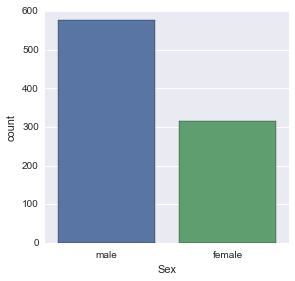

In [36]:
sns.factorplot('Sex',data=titanic_df, kind="count")

In [37]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
age_na = titanic_df['Age']

# counting Nan in the Age coloumn

In [68]:
len(np.isnan(age_na)[(np.isnan(age_na)==True)])

177

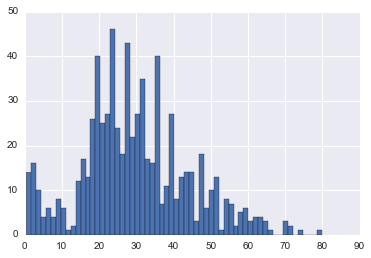

In [42]:
titanic_df['Age'].hist(bins=60)

In [74]:
titanic_df['Gender'] = titanic_df['Sex'].map( lambda x: x[0].upper())

In [77]:
titanic_df['Gender'] = titanic_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [86]:
titanic_df[ titanic_df['Age'].isnull() ][['Gender','Pclass','Age','Parch','Fare', 'SibSp']].head(10)

,Gender,Pclass,Age,Parch,Fare,SibSp
5,1,3,NaN,0,8.4583,0
17,1,2,NaN,0,13.0000,0
19,0,3,NaN,0,7.2250,0
26,1,3,NaN,0,7.2250,0
28,0,3,NaN,0,7.8792,0
29,1,3,NaN,0,7.8958,0
31,0,1,NaN,0,146.5208,1
32,0,3,NaN,0,7.7500,0
36,1,3,NaN,0,7.2292,0
42,1,3,NaN,0,7.8958,0


In [87]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [91]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = titanic_df[(titanic_df['Gender'] == i) & \
                              (titanic_df['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [94]:
titanic_df['AgeFill'] = titanic_df['Age']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35


In [104]:
for i in range(0, 2):
    for j in range(0, 3):
        titanic_df.loc[ (titanic_df.Age.isnull()) & (titanic_df.Gender == i) & (titanic_df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

In [98]:
titanic_df[ titanic_df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [99]:
titanic_df['AgeIsNull'] = pd.isnull(titanic_df.Age).astype(int)

In [105]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [106]:
titanic_df['Age*Class'] = titanic_df.AgeFill * titanic_df.Pclass

In [107]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22,0,1,66
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38,0,1,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26,0,0,78
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35,0,1,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35,0,0,105


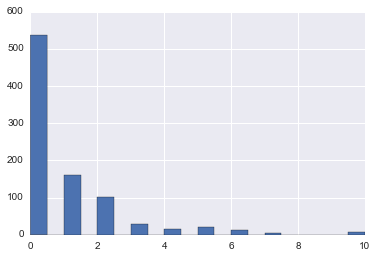

In [113]:
titanic_df['FamilySize'].hist(bins=20)

In [114]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int32
AgeFill        float64
AgeIsNull        int32
FamilySize       int64
Age*Class      float64
dtype: object

In [117]:
titanic_df.dtypes[titanic_df.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [118]:
titanic_df = titanic_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [ ]:
df = df.dropna()